In [3]:
# Import the packages
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# Change the path to the place where UScomments.csv is saved
df=pd.read_csv("/Users/deveshmaheshwari/Documents/1_Purdue/1_Purdue/Web Data/Project/UScomments.csv", low_memory='False')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Display first 5 rows of dataset
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
df.shape

(691407, 4)

In [7]:
# Function to create a wordcloud of each comment
def wordcloud_column(column): 
    plt.figure(figsize = (20,20))
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords,
    max_words = 10000,
    max_font_size = 100,
    random_state = 42
    ).generate(str(df[column]))
    plt.imshow(wordcloud)
    plt.title('WORD CLOUD for '+column.upper(), fontsize = 20)
    plt.axis('off')
    plt.savefig("/Users/deveshmaheshwari/Documents/1_Purdue/1_Purdue/Web Data/Project.jpg")
    plt.show()

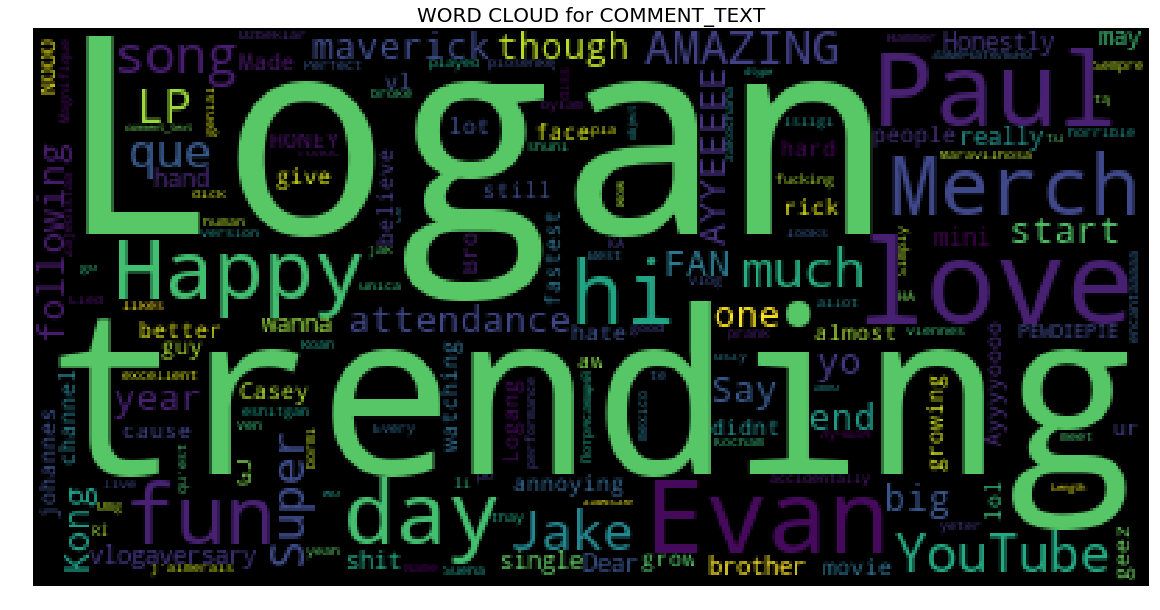

In [8]:
wordcloud_column("comment_text")

In [9]:
# !pip install wordcloud
# !pip install vaderSentiment

In [10]:
# Creating a SentimentIntensityAnalyzer object for text analysis
analyser = SentimentIntensityAnalyzer()

In [ ]:
# Extract the total score of each sentence
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [ ]:
# References: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f


In [ ]:
# A list to store sentiment score of each video
sentiment_scores=[]
# Loop through each comment, calculate sentiment score and store in a list
for i in range(0,len(df)):
    try:
        text=df.loc[i,'comment_text']
        sentiment_scores.append(sentiment_analyzer_scores(df.loc[i,'comment_text']))
    except:
        sentiment_scores.append(0)
        continue
        
        

In [ ]:
# Add a new column in dataframe for storing sentiment score for each video
df["sentiment_score"]=sentiment_scores

In [ ]:
len(sentiment_scores)
df.shape

In [ ]:
# Creating a new file to store comments details and sentiment score for each video
df.to_csv("/Users/deveshmaheshwari/Documents/1_Purdue/1_Purdue/Web Data/Project/UScomments_sentiments.csv")